# **Using Morphology to Modify Object Shape in Image Processing**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
from google.colab import files
img1 = files.upload()

Saving img1.tif to img1.tif


In [ ]:
# Read image (binary / grayscale)
img = cv2.imread("img1.tif", cv2.IMREAD_GRAYSCALE)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  # Converting gray-scale image to binary(black & white), the threshold value is equal to 127, more than 127 is set to 255(white)

In [ ]:
# Structuring element
#A kernel (structuring element) defines the shape and size of the neighborhood used by morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))  # Creating 5*5 rectangular structuring kernel

In [ ]:
# Morphological operations
erosion = cv2.erode(binary, kernel, iterations=1)
dilation = cv2.dilate(binary, kernel, iterations=1)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)


In [ ]:
# Hit-or-miss (requires binary 0/1 not 0/255)
# The code converts the image to 0/1, defines a structuring pattern, and then uses hit-or-miss to detect where patterns of cross and rectangular appear in the binary image
binary01 = (binary > 0).astype(np.uint8)
se1 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
se2 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
hitmiss = cv2.morphologyEx(binary01, cv2.MORPH_HITMISS, se1)

In [ ]:
# Boundary extraction: dilation - original after this subtraction onlt the outlier remains
boundary = dilation - binary

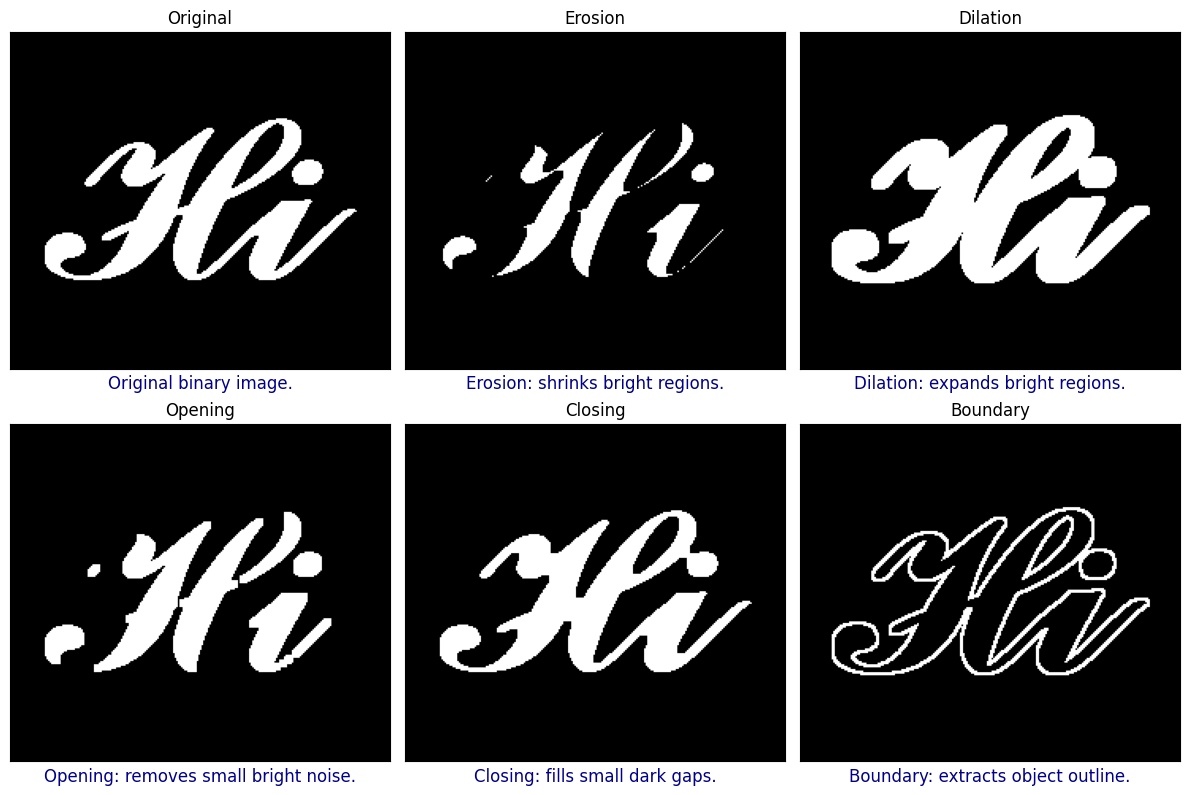

In [ ]:
# Morpholoy makes objects appropriate for segmentation and shape_based analysis
titles = ["Original", "Erosion", "Dilation", "Opening", "Closing", "Boundary"]

captions = [
    "Original binary image.",
    "Erosion: shrinks bright regions.",
    "Dilation: expands bright regions.",
    "Opening: removes small bright noise.",
    "Closing: fills small dark gaps.",
    "Boundary: extracts object outline."
]

imgs = [binary, erosion, dilation, opening, closing, boundary]

plt.figure(figsize=(12,8))

for i in range(len(imgs)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(imgs[i], cmap='gray')
    plt.title(titles[i])
    plt.xlabel(captions[i], fontsize=12, color='darkblue')  # caption in dark blue
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()


# **Segmentation of Bright Regions in Industrial Images Using Thresholding**

In [ ]:
from google.colab import files
img2 = files.upload()

Saving img2.tif to img2 (1).tif


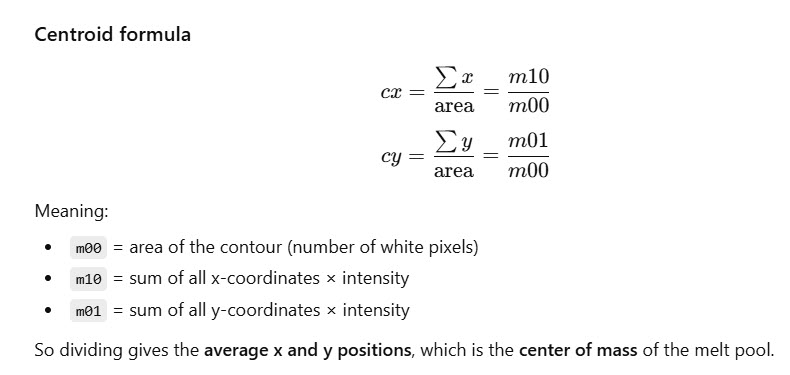

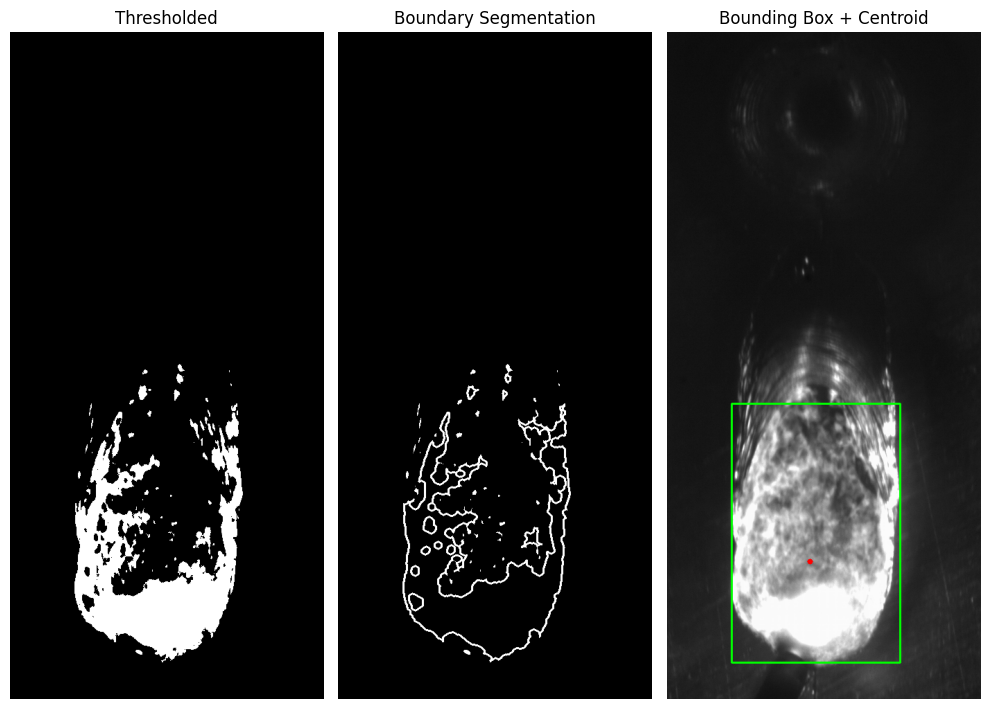

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load melt pool image
img = cv2.imread("img2.tif")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold to isolate bright region
# Thresholding is used to convert the grayscale melt-pool image into a binary mask by keeping only the bright melt pool region and removing the background
_, th = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY) # Threshold is defined 180, more than 180, the pixel becomes white (set to 255), lower than is set to black(0)

# Morphology to clean noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7)) # Creating smoother kernel(elliptical) used in morphology-close process.
clean = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel) # Applying close operation which removes small black noise and smooths the boundry

# Boundary segmentation
eroded = cv2.erode(clean, kernel, iterations=1)
boundary = clean - eroded  #The result is a thin interior boundary (edge) of the melt pool region. note it is very similar to dilation - original, but it results inner boundry while the latter extracts outer boundry

# Find melt pool contour
contours, _ = cv2.findContours(clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  #Retrieves only the outermost contour, ignoring internal ones
cnt = max(contours, key=cv2.contourArea) # Because the melt pool is the largest bright region, you pick the contour with the biggest area

# Width & height
x, y, w, h = cv2.boundingRect(cnt)

# Centroid
M = cv2.moments(cnt)
cx = int(M["m10"] / M["m00"])  # calculating center of mass so it is averaged/ M[m00] is area
cy = int(M["m01"] / M["m00"])

# Draw bounding box + centroid
output = img.copy()
cv2.rectangle(output, (x,y), (x+w, y+h), (0,255,0), 2)
cv2.circle(output, (cx,cy), 4, (0,0,255), -1)

# SHOW RESULTS
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(th, cmap='gray')
plt.title("Thresholded")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(boundary, cmap='gray')
plt.title("Boundary Segmentation")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Bounding Box + Centroid")
plt.axis("off")

plt.tight_layout()
plt.show()
